In [1]:
import sys
import os
sys.path.append("../")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import pandas as pd
import tensorflow as tf

2023-04-28 17:29:34.275295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_set = pd.read_csv("../dataset/csv/train.csv", index_col=0)
test_set = pd.read_csv("../dataset/csv/test.csv", index_col=0)

In [4]:
new_dataset_train_path = "../preprocessed_dataset/train/"
new_dataset_val_path = "../preprocessed_dataset/validation/"

if not os.path.exists(new_dataset_train_path):
    os.makedirs(new_dataset_train_path+'MALIGNANT')
    os.makedirs(new_dataset_train_path+'BENIGN')
if not os.path.exists(new_dataset_val_path):
    os.makedirs(new_dataset_val_path+'MALIGNANT')
    os.makedirs(new_dataset_val_path+'BENIGN')

In [5]:
images = []
clahe=cv2.createCLAHE(clipLimit=40)

for p_id, label, image_path in train_set.values:
    image = cv2.imread(image_path, 0)
    gray_img_eqhist=cv2.equalizeHist(image)
    gray_clahe_image = cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2RGB)
    image = tf.image.resize(gray_clahe_image, (229, 229)).numpy().astype("uint8")
    save_dir = os.path.join(new_dataset_train_path, label, p_id+'.jpg')
    cv2.imwrite(save_dir, image)

2023-04-28 17:29:35.976673: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 17:29:35.976713: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [6]:
for p_id, label, image_path in test_set.values:
    image = cv2.imread(image_path, 0)
    gray_img_eqhist=cv2.equalizeHist(image)
    gray_clahe_image = cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2RGB)
    image = tf.image.resize(gray_clahe_image, (229, 229)).numpy().astype("uint8")
    save_dir = os.path.join(new_dataset_val_path, label, p_id+'.jpg')
    cv2.imwrite(save_dir, image)

In [18]:
image = cv2.imread(image_path, 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

NameError: name 'image_path' is not defined

In [252]:
hist,bins = np.histogram(image.flatten(),256,[0,256]) 

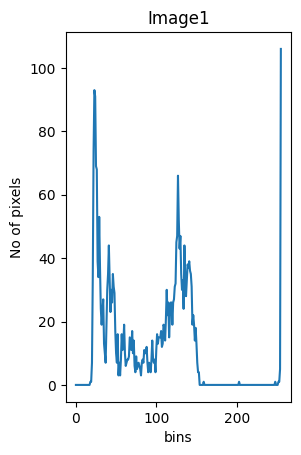

In [253]:
hist=cv2.calcHist(image,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

In [16]:
gray_img_eqhist=cv2.equalizeHist(image)
hist,bins = np.histogram(gray_img_eqhist.flatten(),256,[0,256])
plt.subplot(121)
plt.plot(hist)
plt.show()

NameError: name 'image' is not defined

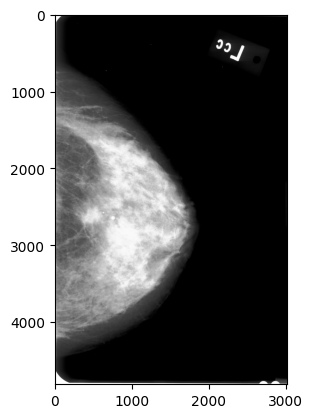

In [255]:
plt.imshow(cv2.cvtColor(gray_img_eqhist, cv2.COLOR_BGR2RGB))

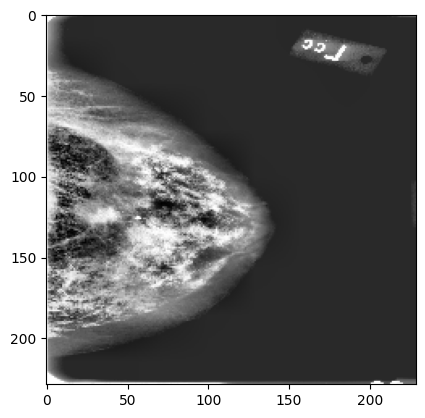

In [257]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=cv2.cvtColor(clahe.apply(gray_img_eqhist), cv2.COLOR_GRAY2BGR)
im = tf.image.resize(gray_img_clahe, (229, 229)).numpy().astype(np.uint8)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))